### Treść zadania

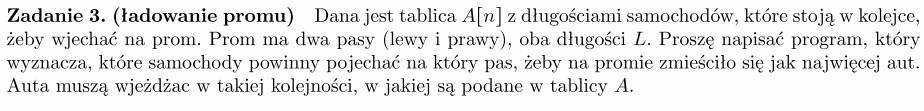

### Omówienie algorytmu

Poniższe omówienie dotyczy tego zadania ze zmnienioną nieco treścią. Zamiast prawego i lewego pasa, mamy górny i dolny pokład.
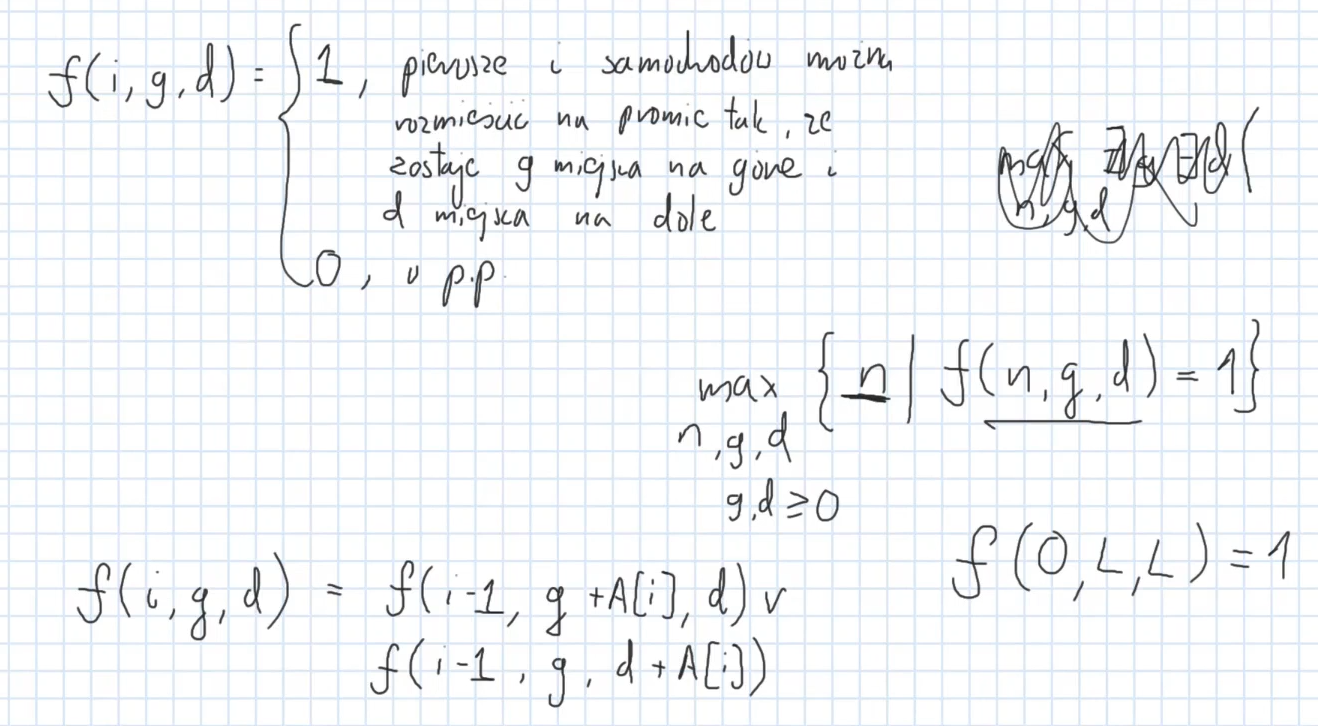

###### UWAGA:
Ponieważ nie mamy nic powiedzianego w poleceniu, czy liczby, odznaczające długości samochodów, są liczbami rzeczywistymi, czy naturalnymi, nie możemy po prostu spamiętywać tych liczb, bo tablice indeksowane są liczbami naturalnymi, a nie zmiennoprzecinkowymi. Gdybyśmy mogli wykorzystać hashmapę, wówczas wystarczyłoby spamiętywać wartości takimi, jakie są (jakie otrzymamy). Ponieważ jednak z hashmapy nie możemy skorzystać, zakładam, że długości samochodów są wyrażone liczbami zmiennoprzecinkowymi z dokładnością do 2 cyfr po przecinku i przeskaluję wszystkie liczby, mnożąc je przez 100, do liczb naturalnych.
###### UWAGA
W tym zadaniu chyba jednak po cichu zostało przyjęte założenie, że długości samochodów wyrażają się liczbami naturalnymi, czego nikt nie był łaskaw zaznaczyć, a polecenie w żaden sposób tego nie sugeruje.

### Złożoność

##### Implementacja #1:
###### Obliczeniowa:
$ O(n^3) $
###### Pamięciowa:
$ O(n^3) $
##### Implementacja #2:
###### Obliczeniowa:
$ O(n^3) $
###### Pamięciowa:
$ O(n^2) $

### Implementacja #1
##### Ze spamiętywaniem pozostałego miejsca na obu pasach

In [1]:
def map_cars(A, L):
    total = 0
    for i in range(len(A)):
        A[i] = int(A[i] * 100 + .5)
        total += A[i]
        # If we exceeded maximum possible length, return an index of the last car
        if total > 2 * L:
            return i - 1
    # If all may fit in, return the last possible car's index
    return len(A) - 1
    

def ferry(L: 'length of a ferry', A: 'array of cars lengths'):
    # Map all car lengths to the integer values (multiply by 100)
    # and leave all the cars which in no way can fit in the ferry
    n = len(A)
    L = int(100 * L + .5)
    last_i = map_cars(A, L)
    # Prepare array which will be used to cache values
    F = [[[None] * (L + 1) for _ in range(L + 1)] for _ in range(last_i + 1)]
    P = [''] * n
    
    def recur(i: 'current car index', 
              l: 'remaining space on the left lane',
              r: 'remaining space on the right lane'):
        # If the next car cannot fit in
        if l < 0 or r < 0:
            return False
        if i == 0:
            if l >= A[0]: P[0] = 'L'; return True
            if r >= A[0]: P[0] = 'R'; return True
            return False
        if F[i][l][r] is None:
            if recur(i - 1, l - A[i], r):
                F[i][l][r] = True
                P[i] = 'L'
            elif recur(i - 1, l, r - A[i]):
                F[i][l][r] = True
                P[i] = 'R'
        return F[i][l][r]
    
    for i in range(last_i, -1, -1):
        if recur(i, L, L):
            return i + 1, P
    return -1, []

###### Kilka testów

##### Pomocnicze

In [2]:
def check(L, cars, output):
    l_sum = r_sum = 0
    for i in range(len(cars)):
        if output[i] == 'R':
            r_sum += cars[i]
        elif output[i] == 'L':
            l_sum += cars[i]
    l_sum /= 100
    r_sum /= 100
    print('Length of a ferry', L)
    print('Left lane: ', l_sum)
    print('Right lane:', r_sum)
    print('Ok?', l_sum <= L and r_sum <= L)

In [3]:
L = 18.24

cars = [3.15, 7.23, 4.98, 2.88, 6.34, 4.39, 2.63, 4.88]
res = ferry(L, cars)
print(res)
check(L, cars, res[1])

(8, ['R', 'R', 'R', 'R', 'L', 'L', 'L', 'L'])
Length of a ferry 18.24
Left lane:  18.24
Right lane: 18.24
Ok? True


In [4]:
L = 18.24

cars = [3.16, 7.23, 4.98, 2.88, 6.34, 4.39, 2.63, 4.88]
res = ferry(L, cars)
print(res)
check(L, cars, res[1])

(7, ['R', 'R', 'R', 'L', 'L', 'L', 'L', ''])
Length of a ferry 18.24
Left lane:  16.24
Right lane: 15.37
Ok? True


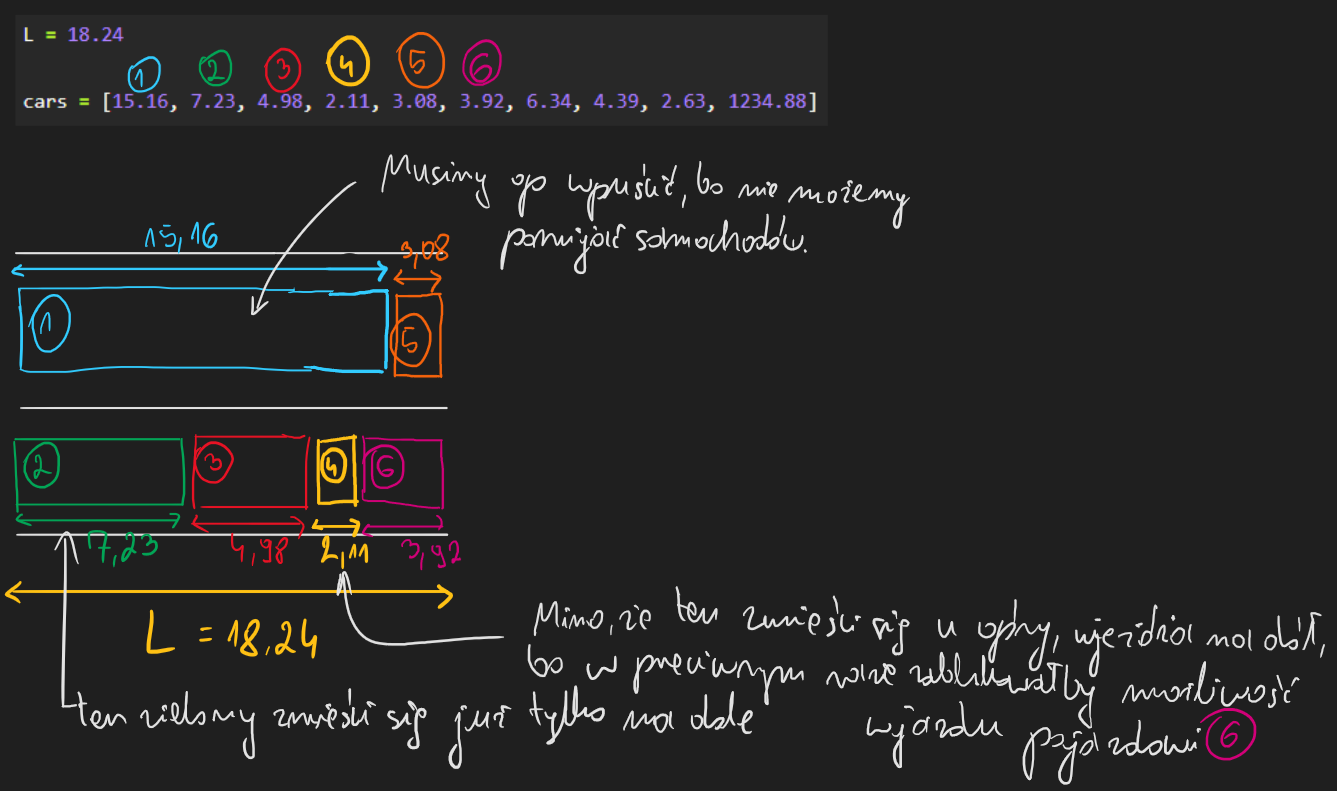

In [5]:
L = 18.24

cars = [15.16, 7.23, 4.98, 2.11, 3.08, 3.92, 6.34, 4.39, 2.63, 1234.88]
res = ferry(L, cars)
print(res)
check(L, cars, res[1])

(6, ['R', 'L', 'L', 'L', 'R', 'L', '', '', '', ''])
Length of a ferry 18.24
Left lane:  18.24
Right lane: 18.24
Ok? True


### Implementacja #2
##### Ze spamiętywaniem pozostałego miejsca tylko na jednym pasie

In [6]:
def map_cars(A, L):
    total = 0
    for i in range(len(A)):
        A[i] = int(A[i] * 100 + .5)
        total += A[i]
        # If we exceeded maximum possible length, return an index of the last car
        if total > 2 * L:
            return i - 1
    # If all may fit in, return the last possible car's index
    return len(A) - 1
    

def ferry(L: 'length of a ferry', A: 'array of cars lengths'):
    # Map all car lengths to the integer values (multiply by 100)
    # and leave all the cars which in no way can fit in the ferry
    n = len(A)
    L = int(100 * L + .5)
    last_i = map_cars(A, L)
    # Prepare array which will be used to cache values
    F = [[None] * (L + 1) for _ in range(last_i + 1)]
    P = [''] * n
    # Calculate sums of all cars lengths from 'i'th index to the end
    S = [0] * (last_i + 2)
    S[last_i] = A[last_i]
    for i in range(last_i - 1, -1, -1):
        S[i] = S[i + 1] + A[i]
            
    # Index of the last car considered (which may fit into the ferry)
    end_idx = 0
    
    def remaining_right_space(i, l):
        all_sum = S[i + 1] - S[end_idx + 1]
        return L - (all_sum - (L - l))
    
    def recur(i: 'current car index', 
              l: 'remaining space on the left lane'):
        # If the next car cannot fit in
        r = remaining_right_space(i, l)
        if l < 0 or r < 0:
            return False
        if i == 0:
            if l >= A[0]: P[0] = 'L'; return True
            if r >= A[0]: P[0] = 'R'; return True
            return False
        elif F[i][l] is None:
            if recur(i - 1, l - A[i]):
                F[i][l] = True
                P[i] = 'L'
            elif recur(i - 1, l):
                F[i][l] = True
                P[i] = 'R'
        return F[i][l]
    
    for i in range(last_i, -1, -1):
        end_idx = i
        if recur(i, L):
            return i + 1, P
    return -1, []

###### Kilka testów

In [7]:
L = 18.24

cars = [3.15, 7.23, 4.98, 2.88, 6.34, 4.39, 2.63, 4.88]
res = ferry(L, cars)
print(res)
check(L, cars, res[1])

(8, ['R', 'R', 'R', 'R', 'L', 'L', 'L', 'L'])
Length of a ferry 18.24
Left lane:  18.24
Right lane: 18.24
Ok? True


In [8]:
L = 18.24

cars = [3.16, 7.23, 4.98, 2.88, 6.34, 4.39, 2.63, 4.88]
res = ferry(L, cars)
print(res)
check(L, cars, res[1])

(7, ['R', 'R', 'R', 'L', 'L', 'L', 'L', ''])
Length of a ferry 18.24
Left lane:  16.24
Right lane: 15.37
Ok? True


In [9]:
L = 18.24

cars = [15.16, 7.23, 4.98, 2.11, 3.08, 3.92, 6.34, 4.39, 2.63, 1234.88]
res = ferry(L, cars)
print(res)
check(L, cars, res[1])

(6, ['R', 'L', 'L', 'L', 'R', 'L', '', '', '', ''])
Length of a ferry 18.24
Left lane:  18.24
Right lane: 18.24
Ok? True
